In [1]:
import numpy as np
import cPickle as pickle
import gzip

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
with gzip.open("../../data/mnist.pkl.gz") as f:
    dat = pickle.load(f)
train_data, valid_data, test_data = dat
X_train_I, _ = train_data

X_train_I = (X_train_I*256).astype("int32")

In [4]:
X_train_I.shape

(50000, 784)

In [6]:
X_train_I_flatten = X_train_I[0:100].flatten()
X_train_I_flatten.shape

(78400,)

In [8]:
tmp = []
b=0
while True:
    bs=10
    if b*bs >= 100:
        break
    batch = X_train_I[(b*bs):(b+1)*bs]
    tmp += batch.flatten().tolist()
    b += 1

In [14]:
len(tmp), len(X_train_I_flatten)

(78400, 78400)

In [20]:
(tmp == X_train_I_flatten)

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [8]:
def integer_to_one_hot(X_train):
    total = np.zeros((X_train.shape[0], X_train[0].shape[0], 256)).astype("float32")
    for b in range(0, X_train.shape[0]):
        seqs = np.zeros((X_train[b].shape[0], 256)).astype("float32")
        for i in range(0, X_train[b].shape[0]):
            one_hot = np.zeros((256)).astype("float32")
            one_hot[ X_train[b][i] ] = 1.0
            seqs[i] = one_hot
        total[b] = seqs
    return total


In [11]:
img = integer_to_one_hot(X_train_I[0:1])[0]

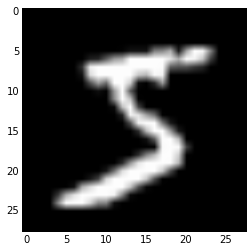

In [19]:
plt.imshow( np.argmax(img, axis=1).reshape((28,28)),cmap="gray" )

In [21]:
np.argmax(img,axis=1)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17